In [18]:
import pandas as pd #helps to create multi dimensional array , matrix etc 
import numpy as np #helps to deal with arrays and matrix using built in math function 
import seaborn as sns  #for data visualization 
import matplotlib.pyplot as plt # used for plotting 
%matplotlib inline



In [19]:
df = pd.read_csv('secondary_data_temp.csv') #opening dataset and putting it in df variable 
df 

,Time,H1,H2,T1,T2
0,0,0.0,0.0,19.29,18.32
1,1,0.0,0.0,19.29,18.32
2,2,0.0,0.0,19.16,18.32
3,3,0.0,0.0,19.16,18.32
4,4,0.0,0.0,19.25,18.32
...,...,...,...,...,...
596,596,50.0,80.0,40.91,33.92
597,597,50.0,80.0,40.91,33.63
598,598,50.0,80.0,40.88,33.85
599,599,50.0,80.0,40.88,34.01


In [20]:
print("Dataset Information") 
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    601 non-null    int64  
 1   H1      601 non-null    float64
 2   H2      601 non-null    float64
 3   T1      601 non-null    float64
 4   T2      601 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 23.6 KB


<AxesSubplot:>

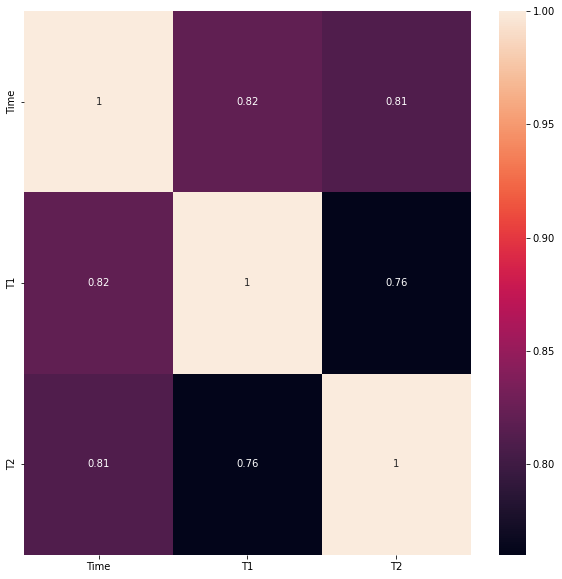

In [39]:
matrix = df.corr().round(2)     
fig= plt.subplots(figsize=(10,10)) # figsize in inches
sns.heatmap(data=matrix,annot=True)

In [22]:

print("Looking for null values ")
df.isnull().sum()

Looking for null values 


Time    0
H1      0
H2      0
T1      0
T2      0
dtype: int64

In [23]:
print("Looking for duplicated values ")
df.duplicated().sum()

Looking for duplicated values 


0

In [24]:
print("Looking For unique values")
df.nunique()

Looking For unique values


Time    601
H1        5
H2        4
T1      282
T2      282
dtype: int64

* Dropping columns

In [25]:
df.drop(["H2", "H1"],axis=1,inplace=True) #dropping the unnecessary column 
df.head()

,Time,T1,T2
0,0,19.29,18.32
1,1,19.29,18.32
2,2,19.16,18.32
3,3,19.16,18.32
4,4,19.25,18.32


In [26]:
df

,Time,T1,T2
0,0,19.29,18.32
1,1,19.29,18.32
2,2,19.16,18.32
3,3,19.16,18.32
4,4,19.25,18.32
...,...,...,...
596,596,40.91,33.92
597,597,40.91,33.63
598,598,40.88,33.85
599,599,40.88,34.01


In [27]:
df.shape #checking the shape of the dataset

(601, 3)

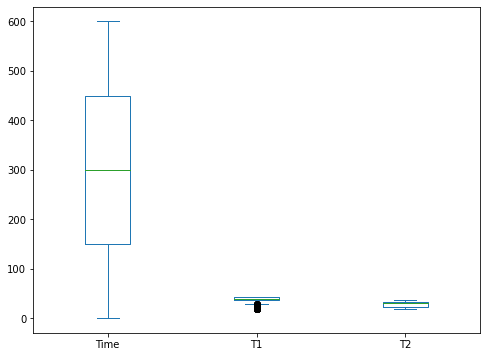

In [29]:
df.plot.box(figsize=(8,6))
plt.show()


<AxesSubplot:>

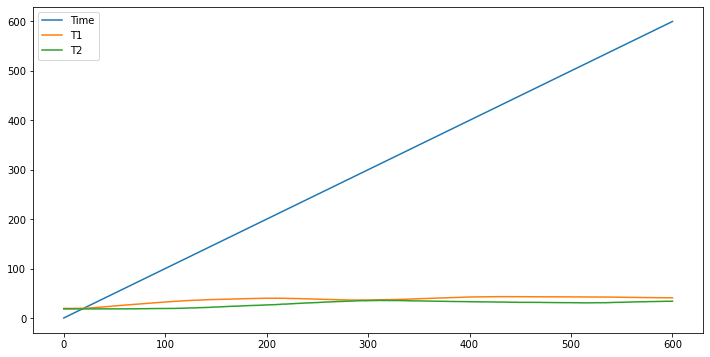

In [33]:
df.plot(figsize=(12,6))

In [ ]:
#Spliting Data Set 
x= df.iloc[:,:-1].values #spillting the data as independent and dependent variable 
y= df.iloc[:,-1].values #selecting data by column numbers 



In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) #defining variables 

In [ ]:

#Linear regression  

from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(x_train,y_train)



In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print('Predicted Values: ', y_test_pred)
print('Actual    Values: ', y_test)


Text(0.5, 0, 'Time')

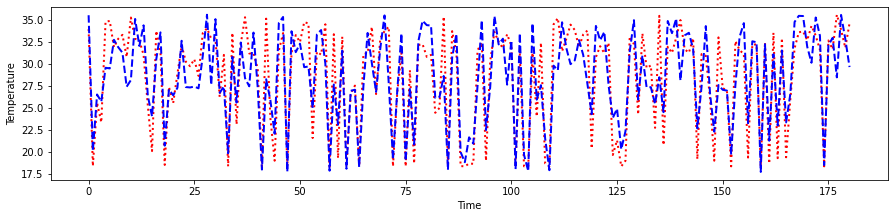

In [35]:
Temp_Actual = y_test
Temp_Predict =y_test_pred
plt.figure(1,figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(Temp_Actual, 'r:' , linewidth=2, label='Temperature (Actual)' )
plt.plot(Temp_Predict, 'b--',linewidth=2, label='Temperature (Predicted)')
plt.ylabel('Temperature')
plt.xlabel('Time')

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print("Training accuracy")
print("RMSE is   :{:.2F}". format(rmse))
print("R2 score is {:.2f}".format(r2))

Training accuracy
RMSE is   :3.49
R2 score is 0.67


In [37]:
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2 = r2_score(y_test,y_test_pred)

print("Testing accuracy:")
print("RMSE is {:.2f}".format(rmse))
print("R2 score is : {:.2f}".format(r2))

Testing accuracy:
RMSE is 3.03
R2 score is : 0.73


In [38]:
accuracy = model.score(x_test, y_test)
print("Model accuracy: {:.2f}". format(accuracy))

Model accuracy: 0.73
